In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('fivethirtyeight')

from numpy.random import default_rng

# HW_02

## Calculating and reporting $\pi$

Calculate your own value of $\pi$ using the random x- and y-coordinates. You need to report your findings to other engineers in your field. You should explain _why_ and _how_ you are calculating $\pi$, then describe the data with at least one plot. You can use more if it helps to explain the process or a point you are trying to make, here are some examples from our first $\pi$ calculation.

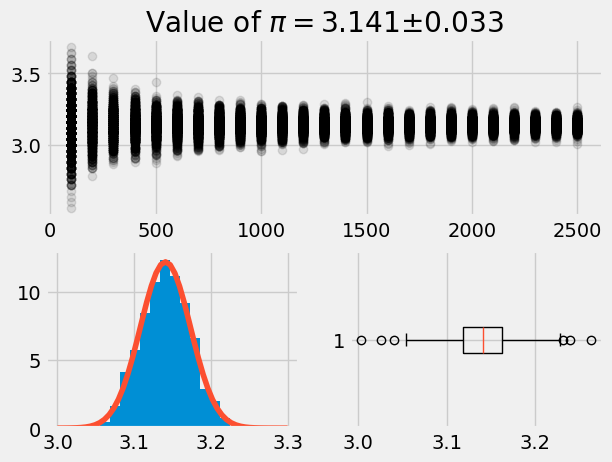

In [23]:
rng = default_rng(12345)
plt.figure()

ax1 = plt.subplot(2, 2, (1, 2))
for N in range(100,2501, 100):
    trials = 1000
    pi_trial = np.zeros(trials)
    for i in range(trials):
        x = rng.random(N)
        y = rng.random(N)

        r = x**2 + y**2

        pi_trial[i] = np.sum(r < 1**2)/N*4

    mean_pi = np.mean(pi_trial)
    std_pi = np.std(pi_trial)

    ax1.plot(N*np.ones(trials), pi_trial, 'ko', alpha = 0.1)
plt.title(r'Value of $\pi=${:1.3f}$\pm${:1.3f}'.format(mean_pi, std_pi));
ax2 = plt.subplot(2, 2, 3)
ax2.hist(pi_trial, 20, density=True)


x = np.linspace(3, 3.3)
pi_pdf = stats.norm.pdf(x, loc = mean_pi, scale = std_pi)
ax2.plot(x, pi_pdf)

ax3 = plt.subplot(2, 2, 4)
ax3.boxplot(pi_trial, vert=False);

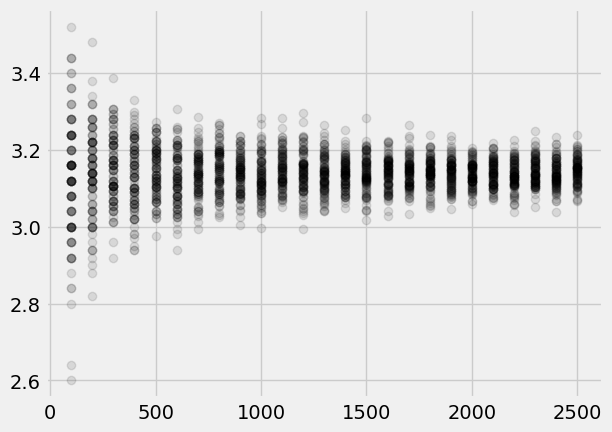

In [25]:
ax1 = plt.subplot(1, 1, 1)
for N in range(100,2501, 100):
    trials = 100
    pi_trial = np.zeros(trials)
    for i in range(trials):
        x = rng.random(N)
        y = rng.random(N)

        r = x**2 + y**2

        pi_trial[i] = np.sum(r < 1**2)/N*4

    mean_pi = np.mean(pi_trial)
    std_pi = np.std(pi_trial)
    plt.plot(N*np.ones(trials), pi_trial, 'ko', alpha = 0.1)

## Some points to consider in your report

- $\pi$ is not a random variable, but the probability that you land in a circle vs a square if your coordinates are x = 0-r and y = 0-r is $\frac{A_{circle}}{A_{square}} = \frac{\pi r^2}{4r^2} = \frac{\pi}{4}$.
- When is the mean "close enough" to $\pi$?
- What do the tails of the calculated $\pi$ values tell us about the prediction?
- What else do you notice in your analysis?


Pi is a very important constant value within math and engineering as it is used for a variety of different equations regarding the perimeter, area, and volume of a circle. As it is a well-known and widely used constant, it is a front-runner for Monte Carlo tests to used upon. Since we have been considering using Monte Carlo analysis for more extensive tests, having a known constant to test it on is a good start to verify the accuracy and applicability of this analysis type. Similarly, using this test on a known value will give us a better understanding of what changes can be made to the Monte Carlo process to get a more accurate result based on how data can be utilized, along with some of the important aspects that go into making Monte Carlo effective.

Within this testing process, the value of pi is found using code that simulates a 1x1 area square in the first quadrant with a circle with a radius 1 inside of it. This is useful because when choosing a random value for x and y within a range from 0-1, a very specific amount of these coordinates are placed within the circle. The code creates many trials that are used to average the number of coordinates placed within the semi-circle, getting more accurate as the value for N increases. This is because as this value increases, there are more and more points used to estimate the value of pi. This results in a more accurate result because as more points are used, it is more likely that an accurate amount of points will fall inside the circle vs those that don't. Since that is the driving factor that determines what the value of pi is in this simulation, the percentage of points falling within the circle for a given amount of trials is very important. Each point plotted on the scatter plot is a single trial that relates to 100-1000 averaged r values. Each r value that falls within the radius of the circle, aka r < 1 will be counted towards the pi_trial, which is then divided by the N trials since it is averaged and multiplied by 4 since it is only quadrant 1 which is a quarter of the actual unit circle.

The data shown within the scatter plot helps to show the effectiveness of Monte Carlo when used correctly. This is shown when the value of N is 100 there is a lot of variability within each trial since getting a bunch of values at once that don't fall within the circle or alternatively getting too many values that do fall within the circle could cause an output that doesn't accurately measure the value of pi. This is due to the small sample size where if an unprobable yet possible event occurs within the random number generator resulting in a bunch of data the skews the average one way the output could be inaccurate. On the other hand, the data utilizing N = 1000 is very accurate as it has a much larger sample size that would require an extremely unprobable data set to skew the data and have an outlier as servere as those shown in the N=100 data set. This is confirmed by the graph, as the value of N increases, the calculated value of pi is clearly much more accurate and precise. As seen within the graph there are generally many less outliers regarding the value of pi as the N value increases for the data set. This says a lot about the Monte Carlo analysis technique, considering as the trials and quantity of data applied per trial increases, the output of the data and analysis becomes more and more accurate and precise with less uncertainty. As explained before, this is because the larger data set allows for a more precise evaluation and average of information as outliers or unlikely events have a smaller effect on the output of the analysis, leading to a sort of convergent event.

For this type of analysis where you can increase the amount of trials and quantity of data used I think a mean "close" enough to pi would have the nominal value of pi given exactly and the tolerance or inaccuracy given as less than +/- 0.05. This is because you can keep increasing the data set used until you result in a very precise average and STDV. Within my data set the histogram doesn't have very skewed tails as there is a large amount of data applied to the last trial creating an accurate graph. Although if there were large tails shown on the graph that would mean that some of the trials were skewed by a large set of unlikly data. For instance if there was a tail to the left, that would mean that there wasn't as much data inside the circle as expected by the area of the circle compared to the square. Alternatively, if there was a tail to the right, that would mean there was more data than expected that fell inside the circle within a few given trials.